In [ ]:
import numpy as np
import pandas as pd

In [ ]:
import geopandas as gpd

In [ ]:
cluster_info = pd.read_csv("cluster_of_clusters_info.csv", index_col="cluster")
gdf = gpd.read_file('gdf_with_clusters.shp')

ERROR:fiona._env:fread(2305) failed on DBF file.


In [ ]:
cluster_of_clusters_info_kmeans = cluster_info.drop(["agglomerative_cluster"], axis=1).groupby('kmeans_cluster').agg('mean')
cluster_of_clusters_info_kmeans

num_of_accidents  at_intersection  total_vehicles  \
kmeans_cluster                                                      
0                       1.425926         0.025464        2.179398   
1                      56.888889         0.639299      120.555556   
2                       2.619914         0.884642        4.982869   
3                       2.452711         0.889882        4.591425   
4                       1.431818         0.036357        2.066667   
5                       1.482185         0.049323        3.703088   
6                      21.412791         0.674703       42.877907   

                avg_vehicles  average_days_ago  avg_accident_time  
kmeans_cluster                                                     
0                   1.541071        707.140046       75679.444444  
1                   2.112018        660.333333       47687.814815  
2                   1.879681        683.554604       11463.743041  
3                   1.855333        707.248424       74409.424968  
4                   1.427489        837.719697       10487.107576  
5                   2.586974        490.731591       20444.501188  
6                   2.016327        649.656977       41592.866279

In [ ]:
# There are 7 different clusters, we will examine each of them closely

In [ ]:
def examine_cluster(cluster):
  display(cluster_info[cluster_info["kmeans_cluster"] == cluster].head())
  indices = list(cluster_info[cluster_info["kmeans_cluster"] == cluster].index)
  gdf[gdf["cluster"].isin(indices)].explore()

In [ ]:
# Cluster 0: This seems to be locations that were not at intersections, often

In [23]:
cluster = 0
cluster_info[cluster_info["kmeans_cluster"] == cluster]

num_of_accidents  at_intersection  total_vehicles  avg_vehicles  \
cluster                                                                    
16                      3              0.0               4      1.333333   
22                      1              0.0               2      2.000000   
38                      1              0.0               2      2.000000   
43                      8              0.0               8      1.000000   
53                      1              0.0               2      2.000000   
...                   ...              ...             ...           ...   
3860                    1              0.0               2      2.000000   
3864                    1              0.0               1      1.000000   
3865                    1              0.0               1      1.000000   
3869                    1              0.0               1      1.000000   
3870                    1              0.0               2      2.000000   

         average_days_ago  avg_accident_time  kmeans_cluster  \
cluster                                                        
16                    856              77522               0   
22                   1345              77400               0   
38                   1332              65220               0   
43                    465              77827               0   
53                   1308              72900               0   
...                   ...                ...             ...   
3860                  591              78180               0   
3864                  583              83700               0   
3865                  579              71340               0   
3869                  525              83160               0   
3870                  473              79380               0   

         agglomerative_cluster  
cluster                         
16                           0  
22                           1  
38                           1  
43                           0  
53                           1  
...                        ...  
3860                         0  
3864                         0  
3865                         0  
3869                         0  
3870                         0  

[864 rows x 8 columns]

In [ ]:
# Keeping the output of .explore makes the notebook size very large (bc .explore is interactive), so there will be screenshots of the outputs

In [ ]:
indices = list(cluster_info[cluster_info["kmeans_cluster"] == cluster].index)
gdf[gdf["cluster"].isin(indices)].explore()

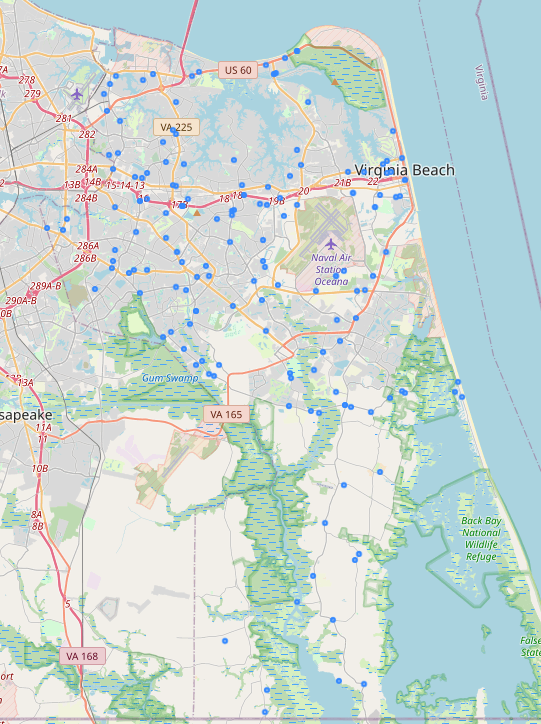

In [22]:
cluster = 1
cluster_info[cluster_info["kmeans_cluster"] == cluster]

num_of_accidents  at_intersection  total_vehicles  avg_vehicles  \
cluster                                                                    
6                      54         0.666667             107      1.981481   
14                     73         0.301370             214      2.931507   
27                     76         0.763158             163      2.144737   
34                     43         0.604651              82      1.906977   
56                     54         0.592593             108      2.000000   
58                     90         0.755556             190      2.111111   
72                     71         0.521127             145      2.042254   
86                     62         0.532258             130      2.096774   
89                     71         0.816901             140      1.971831   
94                     55         0.763636             115      2.090909   
105                    48         0.541667              89      1.854167   
107                    46         0.826087             101      2.195652   
155                    60         0.516667             153      2.550000   
157                    43         0.813953              94      2.186047   
164                    45         0.800000              94      2.088889   
169                    69         0.405797             139      2.014493   
182                    68         0.455882             118      1.735294   
193                    41         0.853659              85      2.073171   
198                    62         0.532258             130      2.096774   
230                    41         0.560976              92      2.243902   
252                    54         0.518519             113      2.092593   
255                    68         0.602941             156      2.294118   
391                    52         0.576923              99      1.903846   
454                    41         0.756098              91      2.219512   
474                    40         0.800000              85      2.125000   
520                    56         0.589286             114      2.035714   
682                    53         0.792453             108      2.037736   

         average_days_ago  avg_accident_time  kmeans_cluster  \
cluster                                                        
6                     677              10344               1   
14                    684              18724               1   
27                    720              14863               1   
34                    687              69077               1   
56                    700              76873               1   
58                    730              67363               1   
72                    731              86327               1   
86                    574              16867               1   
89                    787              18292               1   
94                    696              69689               1   
105                   729              73771               1   
107                   642              66698               1   
155                   530              14567               1   
157                   675              66947               1   
164                   613              67386               1   
169                   578              17339               1   
182                   681              73050               1   
193                   759              66126               1   
198                   473              20954               1   
230                   643              66917               1   
252                   736               5984               1   
255                   622              66941               1   
391                   627              73653               1   
454                   605               2268               1   
474                   581              74336               1   
520                   633              14986               1   
682         

In [ ]:
indices = list(cluster_info[cluster_info["kmeans_cluster"] == cluster].index)
gdf[gdf["cluster"].isin(indices)].explore()

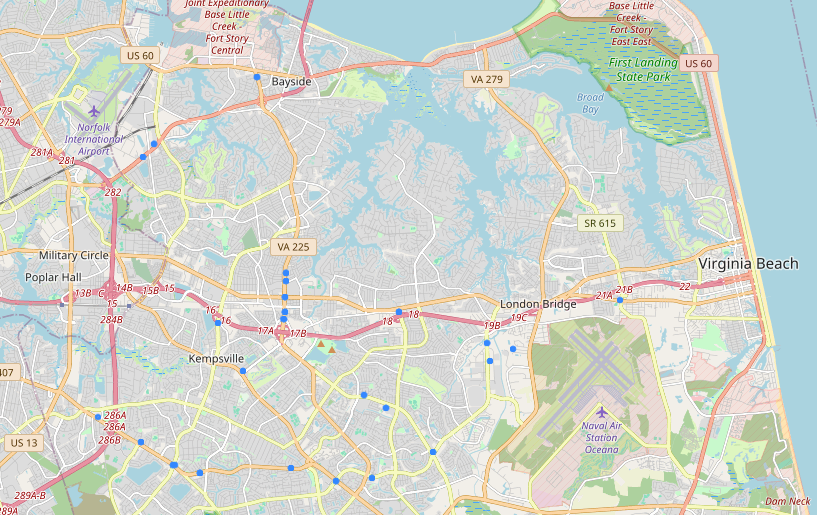

In [24]:
cluster = 2
cluster_info[cluster_info["kmeans_cluster"] == cluster]

num_of_accidents  at_intersection  total_vehicles  avg_vehicles  \
cluster                                                                    
5                       2         1.000000               4      2.000000   
9                       7         0.571429              15      2.142857   
15                     12         0.916667              24      2.000000   
21                      6         0.833333              13      2.166667   
24                     11         0.818182              22      2.000000   
...                   ...              ...             ...           ...   
3816                    1         1.000000               1      1.000000   
3831                    1         1.000000               2      2.000000   
3832                    1         1.000000               2      2.000000   
3843                    1         1.000000               2      2.000000   
3844                    1         1.000000               2      2.000000   

         average_days_ago  avg_accident_time  kmeans_cluster  \
cluster                                                        
5                     685              12300               2   
9                     937              16507               2   
15                    689              19497               2   
21                    860              21133               2   
24                    830               2217               2   
...                   ...                ...             ...   
3816                  784              15300               2   
3831                  760               8159               2   
3832                  756               6479               2   
3843                  731               6539               2   
3844                  726              18540               2   

         agglomerative_cluster  
cluster                         
5                            2  
9                            2  
15                           2  
21                           2  
24                           2  
...                        ...  
3816                         2  
3831                         2  
3832                         2  
3843                         2  
3844                         2  

[934 rows x 8 columns]

In [ ]:
indices = list(cluster_info[cluster_info["kmeans_cluster"] == cluster].index)
gdf[gdf["cluster"].isin(indices)].explore()

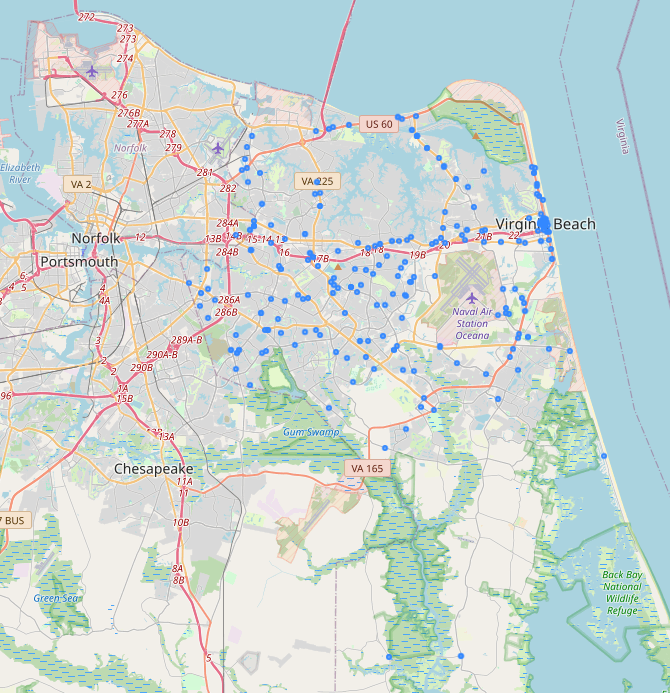

In [25]:
cluster = 3
cluster_info[cluster_info["kmeans_cluster"] == cluster]

num_of_accidents  at_intersection  total_vehicles  avg_vehicles  \
cluster                                                                    
2                       8         0.500000              17      2.125000   
7                       1         1.000000               2      2.000000   
13                     12         0.833333              20      1.666667   
20                      3         0.666667               3      1.000000   
49                      6         0.666667              11      1.833333   
...                   ...              ...             ...           ...   
3839                    1         1.000000               2      2.000000   
3840                    1         1.000000               2      2.000000   
3847                    1         1.000000               2      2.000000   
3856                    1         1.000000               1      1.000000   
3867                    1         1.000000               1      1.000000   

         average_days_ago  avg_accident_time  kmeans_cluster  \
cluster                                                        
2                     968              65864               3   
7                    1359              78060               3   
13                    641              67003               3   
20                   1199              69630               3   
49                    528              71395               3   
...                   ...                ...             ...   
3839                  734              80880               3   
3840                  732              85620               3   
3847                  723              69120               3   
3856                  608              70200               3   
3867                  549              68040               3   

         agglomerative_cluster  
cluster                         
2                            3  
7                            3  
13                           3  
20                           3  
49                           3  
...                        ...  
3839                         3  
3840                         3  
3847                         3  
3856                         3  
3867                         3  

[793 rows x 8 columns]

In [ ]:
indices = list(cluster_info[cluster_info["kmeans_cluster"] == cluster].index)
gdf[gdf["cluster"].isin(indices)].explore()

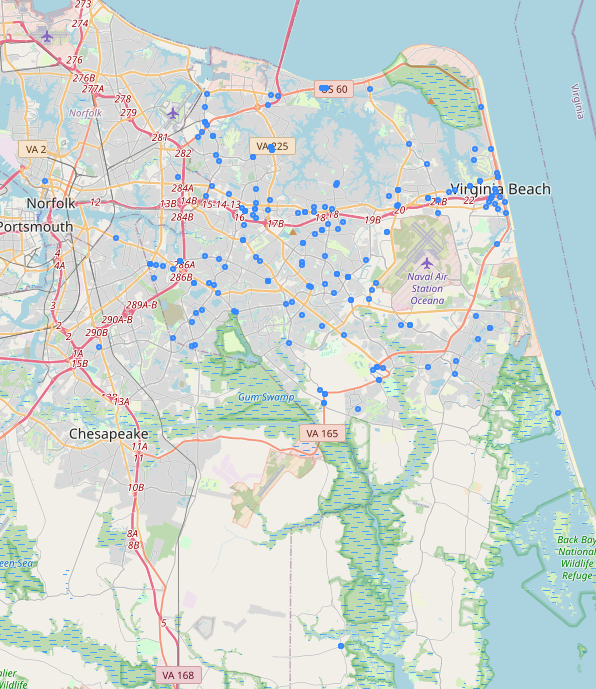

In [27]:
cluster = 4
cluster_info[cluster_info["kmeans_cluster"] == cluster]

num_of_accidents  at_intersection  total_vehicles  avg_vehicles  \
cluster                                                                    
1                       2             0.50               4      2.000000   
4                       2             0.50               4      2.000000   
10                      3             0.00               4      1.333333   
18                      1             0.00               2      2.000000   
30                      4             0.25               4      1.000000   
...                   ...              ...             ...           ...   
3850                    1             0.00               2      2.000000   
3852                    1             0.00               2      2.000000   
3862                    1             0.00               1      1.000000   
3863                    1             0.00               1      1.000000   
3866                    1             0.00               1      1.000000   

         average_days_ago  avg_accident_time  kmeans_cluster  \
cluster                                                        
1                    1210              13170               4   
4                    1301               7829               4   
10                   1128              10504               4   
18                   1348              14700               4   
30                    806              21188               4   
...                   ...                ...             ...   
3850                  714               4260               4   
3852                  699                720               4   
3862                  589               4080               4   
3863                  588                  0               4   
3866                  553               3299               4   

         agglomerative_cluster  
cluster                         
1                            2  
4                            2  
10                           1  
18                           1  
30                           2  
...                        ...  
3850                         1  
3852                         1  
3862                         6  
3863                         6  
3866                         6  

[660 rows x 8 columns]

In [ ]:
indices = list(cluster_info[cluster_info["kmeans_cluster"] == cluster].index)
gdf[gdf["cluster"].isin(indices)].explore()

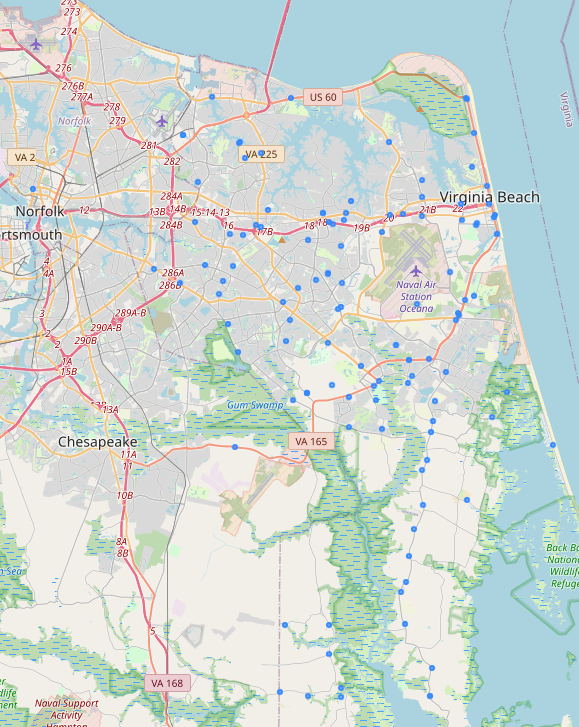

In [29]:
cluster = 5
cluster_info[cluster_info["kmeans_cluster"] == cluster]

num_of_accidents  at_intersection  total_vehicles  avg_vehicles  \
cluster                                                                    
31                      5              0.4              13           2.6   
62                      5              0.0              10           2.0   
69                      1              0.0               3           3.0   
73                      1              0.0               4           4.0   
170                     2              0.0               5           2.5   
...                   ...              ...             ...           ...   
3833                    1              0.0               3           3.0   
3853                    1              0.0               2           2.0   
3858                    1              0.0               2           2.0   
3861                    1              0.0               2           2.0   
3868                    1              0.0               3           3.0   

         average_days_ago  avg_accident_time  kmeans_cluster  \
cluster                                                        
31                    379              21549               5   
62                    569               1027               5   
69                   1305               7200               5   
73                   1309              13620               5   
170                   776              21600               5   
...                   ...                ...             ...   
3833                  758               2700               5   
3853                  650              20940               5   
3858                  608              14399               5   
3861                  587                839               5   
3868                  537              20159               5   

         agglomerative_cluster  
cluster                         
31                           6  
62                           1  
69                           1  
73                           1  
170                          1  
...                        ...  
3833                         1  
3853                         1  
3858                         1  
3861                         6  
3868                         6  

[421 rows x 8 columns]

In [ ]:
indices = list(cluster_info[cluster_info["kmeans_cluster"] == cluster].index)
gdf[gdf["cluster"].isin(indices)].explore()

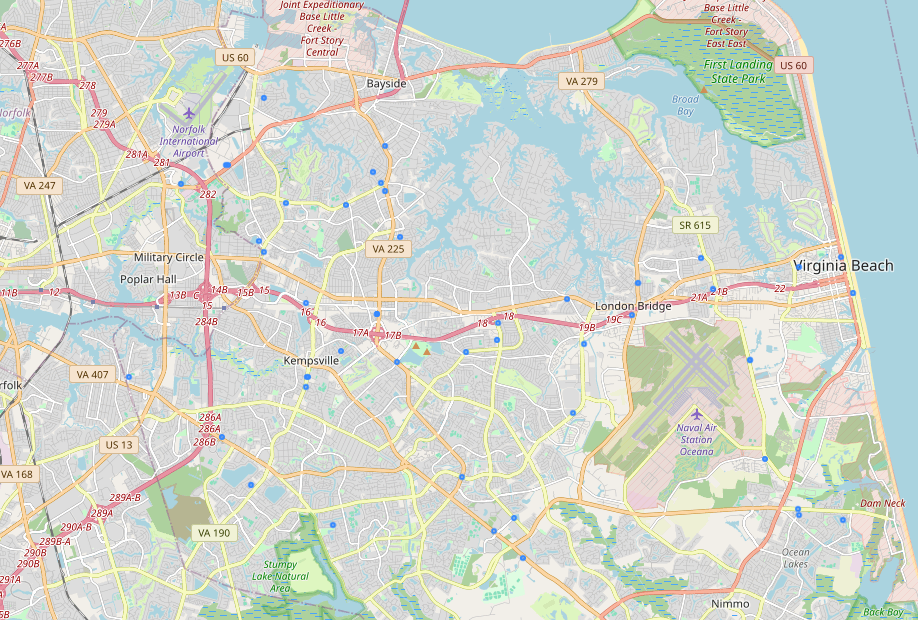

In [31]:
cluster = 6
cluster_info[cluster_info["kmeans_cluster"] == cluster]

num_of_accidents  at_intersection  total_vehicles  avg_vehicles  \
cluster                                                                    
0                      30         0.466667              58      1.933333   
3                      29         0.655172              62      2.137931   
8                      18         0.444444              27      1.500000   
11                     25         0.720000              53      2.120000   
12                     41         0.512195              76      1.853659   
...                   ...              ...             ...           ...   
1328                   16         0.687500              35      2.187500   
1458                   13         0.692308              27      2.076923   
1969                   17         0.529412              36      2.117647   
2491                   12         0.250000              27      2.250000   
2520                   13         0.769231              26      2.000000   

         average_days_ago  avg_accident_time  kmeans_cluster  \
cluster                                                        
0                     733              66557               6   
3                     616              17661               6   
8                     788               6358               6   
11                    535              18126               6   
12                    634              69976               6   
...                   ...                ...             ...   
1328                  564              17127               6   
1458                  874              16532               6   
1969                  861              18301               6   
2491                 1035               2402               6   
2520                 1125              11222               6   

         agglomerative_cluster  
cluster                         
0                            4  
3                            4  
8                            2  
11                           4  
12                           4  
...                        ...  
1328                         2  
1458                         2  
1969                         2  
2491                         2  
2520                         2  

[172 rows x 8 columns]

In [ ]:
indices = list(cluster_info[cluster_info["kmeans_cluster"] == cluster].index)
gdf[gdf["cluster"].isin(indices)].explore()

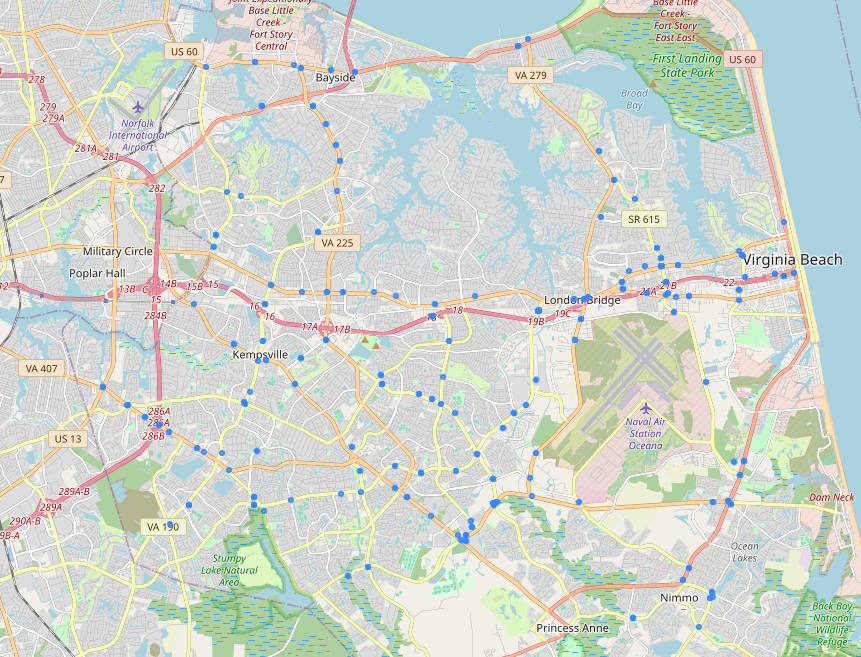